# Analysis of Kickstarter project success
Report by Carlos Neves for [Thinkful](https://www.thinkful.com/) (capstone project 2)

### Introduction
An on-line book store owner is committed to invest in the publication of independent fiction writers. He wants to start a new initiative to support new writers finding funding to publish their work. Crowd-funding, which circumvents traditional avenues of investment, is one popular way for independent creators to fund their project and [Kickstarter](https://www.kickstarter.com/) is one of the world's largest crowd-funding platforms for creative projects. As such, the book store owner wants to use his established on-line infrastructure to test how to maximize the success of a Kickstarter campaign, in order to facilitate independent book publishing by independent writers, books he would in turn be able to sell at his book store.

### Aims
  1. To explore the Kickstarter dataset to identify potential factors associated with successful funding.
  2. To generate a testable hypothesis and define an experimental design to test it. 

### Data 
Data on various projects from the Kickstarter platform was made available on [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects). These data contain information on the projects' category, country and currency, launch date and deadline, goal and current state, which can be used to explore relationships between the project initial aims and its success. 



In [1]:
# Import required packages
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
from IPython.display import Markdown, display

# Set global settings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="white")

## Data cleaning
In this section, the data is loaded into a pandas data frame and initially visualized to understand its structure, content and organization. The data is then subset to the *category* of interest (*Publishing*) and each of the variables is explored and checked to identify potential issues such as missing values, unformatted strings and redundant information.

In [2]:
ks_data = pd.read_csv('ks-projects-201801.csv', index_col = 0)
print('The complete dataset has %d features and %d variables' % ks_data.shape)
ks_data.head()

The complete dataset has 378661 features and 14 variables


name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000011046  Community Film Project: The Art of Neighborhoo...    Film & Video   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16   5000.0  2012-03-17 03:24:11   
1000011046  Film & Video      USD  2015-08-29  19500.0  2015-07-04 08:35:03   

            pledged     state  backers country  usd pledged  usd_pledged_real  \
ID                                                                              
1000002330      0.0    failed        0      GB          0.0               0.0   
1000003930   2421.0    failed       15      US        100.0            2421.0   
1000004038    220.0    failed        3      US        220.0             220.0   
1000007540      1.0    failed        1      US          1.0               1.0   
1000011046   1283.0  canceled       14      US       1283.0            1283.0   

            usd_goal_real  
ID                         
1000002330        1533.95  
1000003930       30000.00  
1000004038       45000.00  
1000007540        5000.00  
1000011046       19500.00

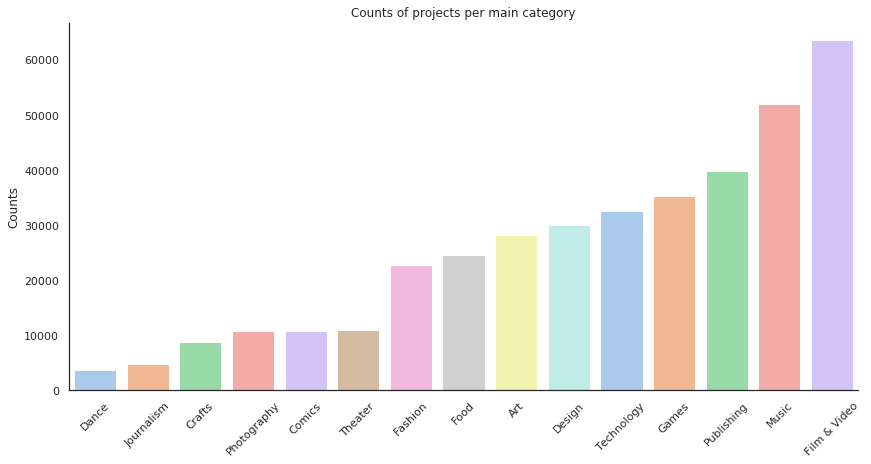

In [3]:
# Barplot for main categories
row_order = list(ks_data.groupby(by=["main_category"]).count()['name'].sort_values().index.values)

g = sns.catplot(x='main_category', aspect = 2, order = row_order,
                data=ks_data, height=6, kind="count", palette="pastel")
g.set_ylabels("Counts")
g.set_xlabels("")
g.set_xticklabels(rotation=45)
plt.title('Counts of projects per main category')

plt.show()

The barplot above shows how the projects are distributed by the different categories. From this plot, it seems that *Publishing* is the third most common category for all the projects started at Kickstarter. This suggests that Kickstarter is indeed a common platform for individuals looking to publish their works through crowd-funding.

#### Missingness and redundancy 
Next, the dataset is subset to contain just those projects in the *Publishing* category and the available variables are checked in more detail to ensure that the data is in the correctly recorded and in a usable format.


In [4]:
## Subset dataset
ks_data = ks_data[ks_data['main_category'] == 'Publishing']

## Confirm subset
print('Available main categories after subset are: %s \n' % (''.join(ks_data['main_category'].unique())))

## Check variable types
display(Markdown('**What are the types of variables on the dataset?**\n\n'))
print(ks_data.dtypes.sort_values())

## Check missing values
display(Markdown('\n\n**What is the proportion of missing data?**\n\n'))
print(ks_data.isna().apply(np.mean).sort_values(ascending = False))

## Check correlation
display(Markdown('\n\n**How much are the variables correlated**\n\n'))

ks_cor = ks_data.corr()
ks_cor = ks_cor.where(np.triu(ks_cor) > 0)
ks_cor = ks_cor.stack()
ks_cor = ks_cor[ks_cor<1]
print(ks_cor.sort_values(axis=0, ascending = False))

Available main categories after subset are: Publishing 



**What are the types of variables on the dataset?**



backers               int64
goal                float64
pledged             float64
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
name                 object
category             object
main_category        object
currency             object
deadline             object
launched             object
state                object
country              object
dtype: object




**What is the proportion of missing data?**



usd pledged         0.012414
usd_goal_real       0.000000
usd_pledged_real    0.000000
country             0.000000
backers             0.000000
state               0.000000
pledged             0.000000
launched            0.000000
goal                0.000000
deadline            0.000000
currency            0.000000
main_category       0.000000
category            0.000000
name                0.000000
dtype: float64




**How much are the variables correlated**



goal              usd_goal_real       0.896870
backers           usd_pledged_real    0.894551
usd pledged       usd_pledged_real    0.872801
pledged           usd_pledged_real    0.858166
backers           usd pledged         0.835084
pledged           backers             0.759822
                  usd pledged         0.741789
goal              pledged             0.003880
usd_pledged_real  usd_goal_real       0.000599
pledged           usd_goal_real       0.000513
usd pledged       usd_goal_real       0.000469
goal              usd_pledged_real    0.000080
dtype: float64


It seems that *usd pledge* has some missing values and is also correlated with *usd_pledged_real*, *backers*, *pledge* and *usd_goal_real*. The correlation between *pledged* and *backers* is not unexpected, as more backers would be expected to result in more capital being pledged to a project. However, the relationship between *usd pledge*, *usd_pledged_real* and *pledge* raises questions of redundancy. This is also evident between *goal* and *usd_goal_real*. According to the information provided on [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects), *"real"* refers to standardized USD values and it would be expected that the *"real"* variables hold more comparative value due to this standardization. This was explored in the following set of scatterplots

Proportion of *pledged* values equal to *USD pledged*: 0.720
Proportion of *pledged* values equal to *USD pledged* (USD only): 0.850


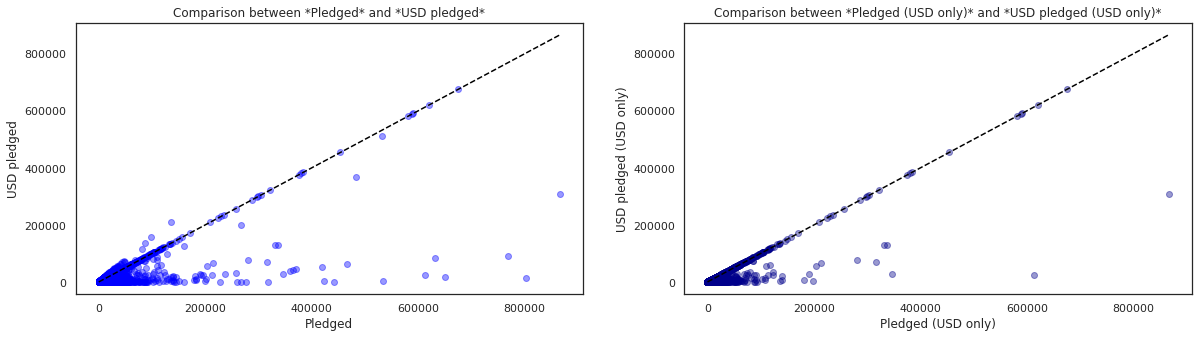

Proportion of *pledged* values equal to *real USD pledged*: 0.842
Proportion of *pledged* values equal to *real USD pledged* (USD only): 1.000


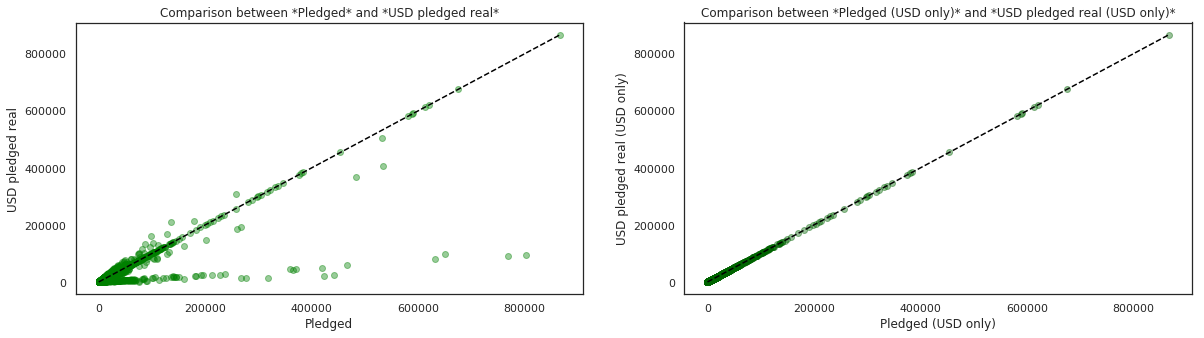

Proportion of *USD pledged* values equal to *real USD pledged*: 0.720
Proportion of *USD pledged* values equal to *real USD pledged* (USD only): 0.850


In [5]:
# Scatterplot wrapper functions
def scatterplot(x, y, data, col, xlab, ylab, line):
    ax = sns.regplot(x= x, 
                   y= y,
                   data = data,
                   fit_reg=False, 
                   scatter_kws={'color': col,'alpha':0.4})
    plt.plot(line, line, color = 'black', linestyle = '--')
    ax.ticklabel_format(style='sci', axis='both')

    ax.set(xlabel=xlab, ylabel=ylab)
    plt.title('Comparison between *' + xlab + '* and *' + ylab + '*')

def scatter_pair(variables, colors, labels, subset):
    fig = plt.figure(figsize=(20, 5))

    mn = min(ks_data[variables[0]].min(), ks_data[variables[1]].min())
    mx = max(ks_data[variables[0]].max(), ks_data[variables[1]].max())

    ax1 = fig.add_subplot(1,2,1)
    scatterplot(x =  variables[0] , y = variables[1], data = ks_data[subset[0]], 
                col = colors[0], xlab = labels[0], ylab = labels[1], line = np.linspace(mn, mx, 100))
    
    
    if len(variables) == 2: return
    
    ax2 = fig.add_subplot(1,2,2)
    scatterplot(x =  variables[2] , y = variables[3], data = ks_data[subset[1]], 
                col = colors[1], xlab = labels[2], ylab = labels[3], line = np.linspace(mn, mx, 100))

    plt.show()


# Pledge variables comparisons
print('Proportion of *pledged* values equal to *USD pledged*: %1.3f' % (np.mean(ks_data['pledged'] == ks_data['usd pledged'])))
print('Proportion of *pledged* values equal to *USD pledged* (USD only): %1.3f' % (np.mean(ks_data.loc[ks_data['currency']=='USD','pledged'] == ks_data.loc[ks_data['currency']=='USD','usd pledged'])))

scatter_pair(variables = ['pledged', 'usd pledged'] * 2, 
        colors = ['blue', 'darkblue'], 
        labels = ["Pledged", "USD pledged", "Pledged (USD only)", "USD pledged (USD only)"], 
        subset = [[True] * ks_data.shape[0], ks_data['currency'] == 'USD'])

print('Proportion of *pledged* values equal to *real USD pledged*: %1.3f' % (np.mean(ks_data['pledged'] == ks_data['usd_pledged_real'])))
print('Proportion of *pledged* values equal to *real USD pledged* (USD only): %1.3f' % (np.mean(ks_data.loc[ks_data['currency']=='USD','pledged'] == ks_data.loc[ks_data['currency']=='USD','usd_pledged_real'])))

scatter_pair(variables = ['pledged', 'usd_pledged_real'] * 2, 
        colors = ['green', 'darkgreen'], 
        labels = ["Pledged", "USD pledged real", "Pledged (USD only)", "USD pledged real (USD only)"], 
        subset = [[True] * ks_data.shape[0], ks_data['currency'] == 'USD'])

print('Proportion of *USD pledged* values equal to *real USD pledged*: %1.3f' % (np.mean(ks_data['usd pledged'] == ks_data['usd_pledged_real'])))
print('Proportion of *USD pledged* values equal to *real USD pledged* (USD only): %1.3f' % (np.mean(ks_data.loc[ks_data['currency']=='USD','usd pledged'] == ks_data.loc[ks_data['currency']=='USD','usd_pledged_real'])))
scatter_pair(variables = ['usd_pledged_real','usd pledged'] * 2, 
        colors = ['red', 'darkred'], 
        labels = ["USD pledged", "USD pledged real", "USD pledged (USD only)", "USD pledged real (USD only)"], 
        subset = [[True] * ks_data.shape[0], ks_data['currency'] == 'USD'])


It can be seen that a perfect match exists between the *pledged* values and the *USD_pledged_real* values for projects in USD, suggesting that the observed difference between these two variables is based on the currency considered. However, *uds pledged* and *usd_pledged_real* do not match completely. It could be thought that the differences would be on the currency conversion used, since *usd_pledged_real* is obtained using an external exchange, while *usd pledge* used the Kickstarter internal exchange, but *uds pledge* still failed to match with both *pledge* and *usd_pledges_real* when only project using USD were considered. Overall, this suggests that *usd pledged* conversion may be incorrect, while the *pledge* value corresponds to various currencies. Thus both *pledge* and *usd pledge* were dropped in favour of the standardized  *usd_pledge_real*. 

As previously mentioned, one other *"real"* variable is found in the dataset (*usd_goal_real*) and it was compared to *goal*, with which it was correlated.

Proportion of *goal* values equal to *usd_goal_real*: 0.804
Proportion of *goal* values equal to *usd_goal_real* (USD only): 1.000


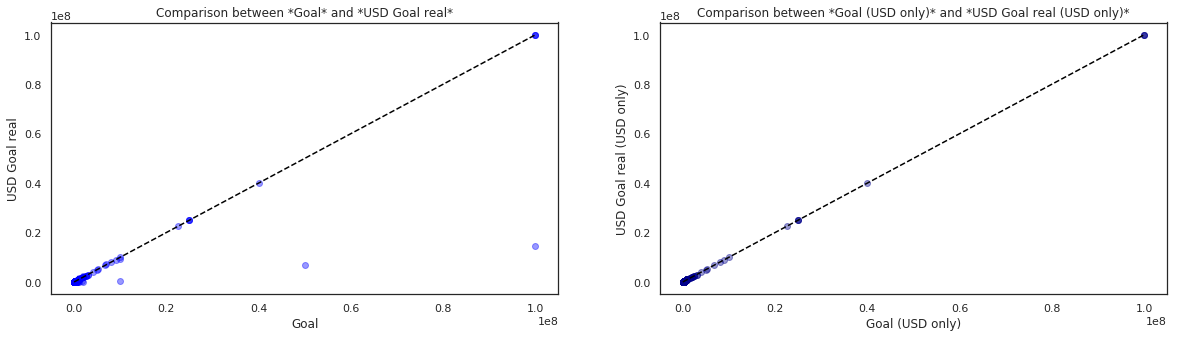

In [6]:
# Goal variables comparison
print('Proportion of *goal* values equal to *usd_goal_real*: %1.3f' % (np.mean(ks_data['goal'] == ks_data['usd_goal_real'])))
print('Proportion of *goal* values equal to *usd_goal_real* (USD only): %1.3f' % (np.mean(ks_data.loc[ks_data['currency']=='USD','goal'] == ks_data.loc[ks_data['currency']=='USD','usd_goal_real'])))

# Goal variables scatterplots
scatter_pair(variables = ['goal', 'usd_goal_real'] * 2, 
        colors = ['blue', 'darkblue'], 
        labels = ["Goal", "USD Goal real", "Goal (USD only)", "USD Goal real (USD only)"], 
        subset = [[True] * ks_data.shape[0], ks_data['currency'] == 'USD'])

In this case, it is clear that the difference between the *goal* and the *usd_goal_real* is simply the currency considered. Consequently, the *goal* was dropped in favour of the standardized *usd_goal_real*.

In addition, the *usd_pledge_real* and the *usd_goal_real* variables were renamed to *pledge* and *goal* for simplicity.

In [7]:
# Drop variables
ks_data = ks_data.drop(['pledged', 'usd pledged', 'goal'], axis = 1)
ks_data = ks_data.rename(index=str, columns={"usd_goal_real": "goal", "usd_pledged_real": "pledged"})

#### Numerical variables
Having identified and removed redundant variables, it is important to confirm that the remaining variables have valid information. To start, numerical variables were analysed to understand their ranges and distribution.

Numerical variables include: backers, pledged, goal


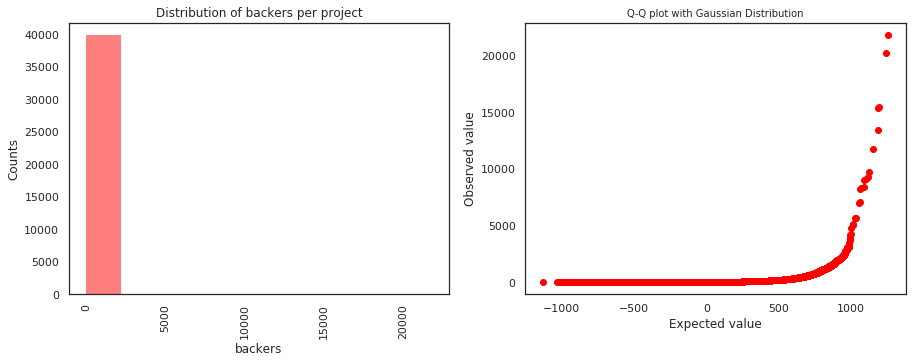

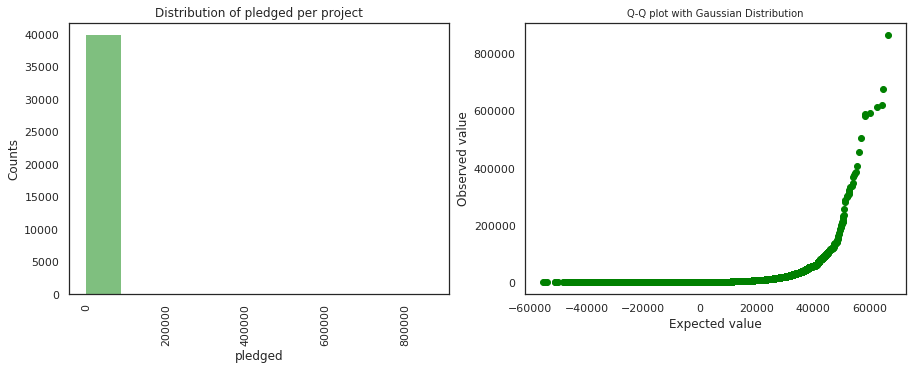

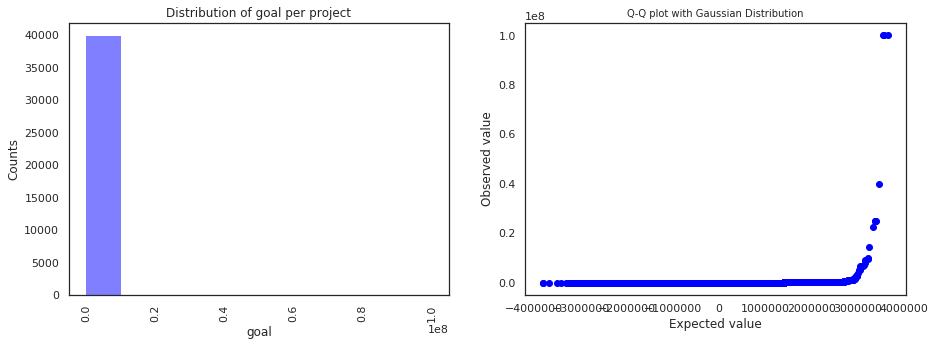

In [8]:
# QQ-plot wrapper function

def qq(variable, color, log = False):
    if log: values = np.log2(ks_data[variable].values + 1)
    else: values = ks_data[variable].values
    normal = np.random.normal(values.mean(), values.std(), len(values))

    normal.sort()
    values.sort()

    fig = plt.figure(figsize=(15, 5))

    ax1 = fig.add_subplot(1,2,1)
    ax = plt.hist(values, color = color, 
                 lw = 0, alpha = 0.5)  
    
    plt.title('Distribution of ' + variable + ' per project')
    plt.ylabel('Counts')
    plt.xlabel(variable)
    plt.xticks(rotation='vertical')

    # Q-Q plots
    ax2 = fig.add_subplot(1,2,2)
    ax = plt.plot(normal, values, "o", color = color) 
    
    plt.ylabel('Observed value')
    plt.xlabel('Expected value')
    plt.title("Q-Q plot with Gaussian Distribution", fontsize=10)

    plt.show()
    

# Numerical variables
numeric = ks_data.select_dtypes(exclude=['object']).columns.values
print('Numerical variables include: %s' % ', '.join(numeric))

colors = ['blue', 'green', 'red']
for var in numeric:
    qq(variable = var, color = colors.pop())
    

The distribution of the numeric variables seems to be highly right (positive) skewed, showing a number of extremely high values, with the majority of the samples concentrated at much lower values. This type of skewness is often corrected by non-linear data transformations that "squeeze" the data (reduce the range). As such, the data was log-transformed.

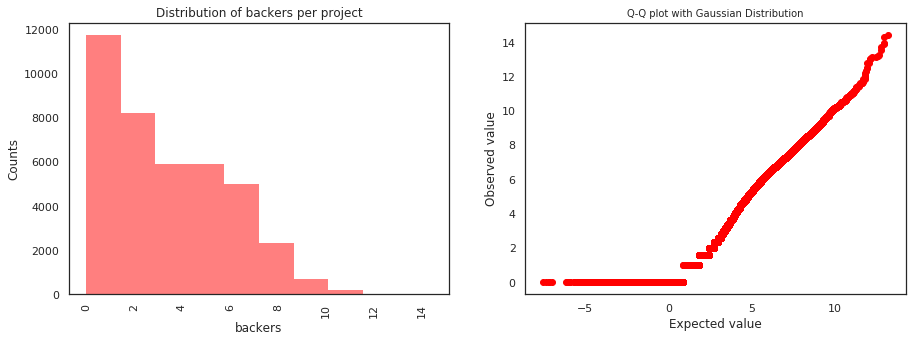

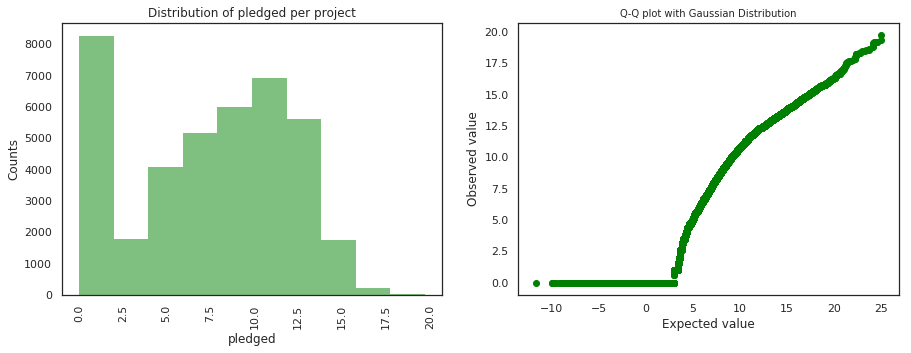

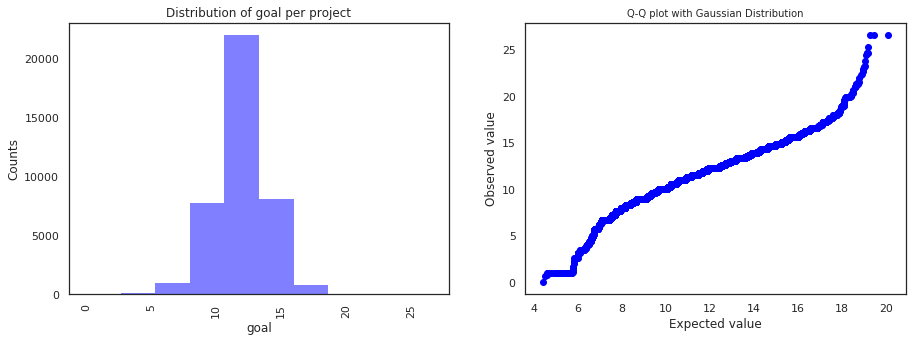

In [9]:
### Check log-transformation

colors = ['blue', 'green', 'red']
for var in numeric:
    qq(variable = var, color = colors.pop(), log = True)

## Update data.frame values
ks_data['log_backers'] = np.log2(ks_data['backers'].values+1)
ks_data['log_pledged'] = np.log2(ks_data['pledged'].values+1)
ks_data['log_goal'] = np.log2(ks_data['goal'].values+1)

The log-transformed variables *goal* and *pledged* now appear to follow a *Gaussian* distribution more closely, with *pledged* having an abnormally high number of 0 values. The distribution of *backers* still shows a positive skew, but it is now more balanced and the weight of large numbers is reduced. 

#### Categorical variables
Once the numerical variables  were checked, the remaining variables were explored to further understand the characteristics of the available data.

In [10]:
# Categorical variables
print('Categorical variables include: %s' % ', '.join(ks_data.select_dtypes('object').columns.values))

Categorical variables include: name, category, main_category, currency, deadline, launched, state, country


Of these variables, the *currency* used is expected to be associated with the *country* of the project.

In [11]:
pd.crosstab(ks_data['country'], ks_data['currency'])

currency  AUD   CAD  CHF  DKK  EUR   GBP  HKD  JPY  MXN  NOK  NZD  SEK  SGD  \
country                                                                       
AT          0     0    0    0   39     0    0    0    0    0    0    0    0   
AU        833     0    0    0    0     0    0    0    0    0    0    0    0   
BE          0     0    0    0   42     0    0    0    0    0    0    0    0   
CA          0  1551    0    0    0     0    0    0    0    0    0    0    0   
CH          0     0   35    0    0     0    0    0    0    0    0    0    0   
DE          0     0    0    0  282     0    0    0    0    0    0    0    0   
DK          0     0    0   83    0     0    0    0    0    0    0    0    0   
ES          0     0    0    0  170     0    0    0    0    0    0    0    0   
FR          0     0    0    0  183     0    0    0    0    0    0    0    0   
GB          0     0    0    0    0  3271    0    0    0    0    0    0    0   
HK          0     0    0    0    0     0   18    0    0    0    0    0    0   
IE          0     0    0    0  107     0    0    0    0    0    0    0    0   
IT          0     0    0    0  183     0    0    0    0    0    0    0    0   
JP          0     0    0    0    0     0    0    1    0    0    0    0    0   
LU          0     0    0    0    9     0    0    0    0    0    0    0    0   
MX          0     0    0    0    0     0    0    0  156    0    0    0    0   
N,0"       24    31    1    2   52    50    0    0    0    4    3    4    0   
NL          0     0    0    0  201     0    0    0    0    0    0    0    0   
NO          0     0    0    0    0     0    0    0    0   72    0    0    0   
NZ          0     0    0    0    0     0    0    0    0    0  176    0    0   
SE          0     0    0    0    0     0    0    0    0    0    0  204    0   
SG          0     0    0    0    0     0    0    0    0    0    0    0   37   
US          0     0    0    0    0     0    0    0    0    0    0    0    0   

currency    USD  
country          
AT            0  
AU            0  
BE            0  
CA            0  
CH            0  
DE            0  
DK            0  
ES            0  
FR            0  
GB            0  
HK            0  
IE            0  
IT            0  
JP            0  
LU            0  
MX            0  
N,0"        324  
NL            0  
NO            0  
NZ            0  
SE            0  
SG            0  
US        31726

As expected, and with the exception of EUR, all currencies are used only in one country. However, the country *"N,0"* seems to use almost all possible currencies. This seems to be an unspecified country which origin would be reasonable guessed, with the exception of those using EUR. However, it is interesting to check if there is any relationship between this unspecific country and project success to exclude any bias in these data.

In [12]:
# Compare N,0" project state with the average

N0 = pd.crosstab(ks_data.loc[ks_data['country'] == 'N,0"','state'], ks_data.loc[ks_data['country'] == 'N,0"','country'], normalize ='columns')
mean = pd.crosstab(ks_data.loc[ks_data['country'] != 'N,0"','state'], ks_data.loc[ks_data['country'] != 'N,0"','country'], normalize ='columns').mean(axis=1)

pd.concat([mean,N0], axis = 1)

0      N,0"
canceled    0.087588  0.002020
failed      0.577103  0.064646
live        0.019678       NaN
successful  0.310711       NaN
suspended   0.004921       NaN
undefined        NaN  0.933333

There seems to be a complete correlation between projects from the *N,0"* country and those with an undefined state. In addition, all *N,0"* project either failed or were cancelled, suggesting that *N,0"* could be an indicator of incompleteness. As such, these projects were removed. Also removed were those projects that were *live* at the time of the data collection, as these would not have any information on their success. Finally, *suspended* and *cancelled*, even though they could occur due to a number of different reasons, were considered as *failed* projects for simplification.

In [13]:
## Remove data
ks_data = ks_data[ks_data['country'] != 'N,0"']
ks_data= ks_data[ks_data['state'] != 'live']
ks_data.loc[np.logical_or(ks_data['state'] == 'suspended', ks_data['state'] == 'canceled'), 'state'] = 'failed'

## Confirm subset
print('Available project state after subset are: %s \n' % ('; '.join(ks_data['state'].unique())))

Available project state after subset are: failed; successful 



#### Date variables
The last type of variables to confirm were the date-related variables. These variables were processed to determine the duration of each project for funding and the starting month and year of the projects. 

In [14]:
## Dates
print('Proportion of launched dates that are missing: %1.3f' % (ks_data['launched'].isna().sum()))
print('Proportion of deadline are missing: %1.3f \n' % (ks_data['deadline'].isna().sum()))

# Check date formats
print(ks_data['launched'].head(), ks_data['deadline'].head(), sep = '\n\n')

# Convert to datetime 
display(Markdown('\n\n**Convert to datetime and find project duration**\n\n'))
ks_data['launched'] = ks_data['launched'].apply(lambda x: dt.datetime.strptime(x.split(' ')[0], '%Y-%m-%d'))
ks_data['deadline'] = ks_data['deadline'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
ks_data['duration'] = ks_data['deadline'] - ks_data['launched']

print(ks_data['duration'].head())

ks_data['month'] = ks_data['launched'].apply(lambda x: x.strftime("%b"))
ks_data['year'] = ks_data['launched'].apply(lambda x: str(x.year))

print('\n\nMonths: %s \n Years: %s' % ('; '.join(ks_data['month'].unique()), 
                                   '; '.join(sorted(ks_data['year'].unique()))))

Proportion of launched dates that are missing: 0.000
Proportion of deadline are missing: 0.000 

ID
1000002330    2015-08-11 12:12:28
100004721     2013-09-09 18:19:37
1000068480    2015-04-10 21:20:54
1000226576    2016-01-02 08:06:07
1000338818    2016-08-31 18:13:01
Name: launched, dtype: object

ID
1000002330    2015-10-09
100004721     2013-10-09
1000068480    2015-05-10
1000226576    2016-02-01
1000338818    2016-10-30
Name: deadline, dtype: object




**Convert to datetime and find project duration**



ID
1000002330   59 days
100004721    30 days
1000068480   30 days
1000226576   30 days
1000338818   60 days
Name: duration, dtype: timedelta64[ns]


Months: Aug; Sep; Apr; Jan; Nov; Oct; Jun; Jul; May; Mar; Feb; Dec 
 Years: 1970; 2009; 2010; 2011; 2012; 2013; 2014; 2015; 2016; 2017


On a first look, there seem to be projects starting in 1970, which immediately strikes as strange. In fact, Kickstarter was created in [2009](https://www.kickstarter.com/about), thus projects cannot have a start date before that year.

In [15]:
ks_data[ks_data['year'] == '1970']

name    category main_category currency  \
ID                                                                          
69489148  Student Auditions Music 2015  Publishing    Publishing      CHF   

           deadline   launched   state  backers country  pledged     goal  \
ID                                                                          
69489148 2015-10-31 1970-01-01  failed       75      CH   4858.0  15000.0   

          log_backers  log_pledged   log_goal   duration month  year  
ID                                                                    
69489148     6.247928    12.246444  13.872771 16739 days   Jan  1970

It seems that this project's launch year was wrongly recorded (or possibly [missing](https://en.wikipedia.org/wiki/System_time)). Considering the deadline date, this project was likely launched in 2015 and this launch date was corrected.

In [16]:
## Impute correct year
ks_data.loc[ks_data['year'] == '1970', 'year'] = '2015'

## Remove launch and deadline dates
ks_data = ks_data.drop(['launched', 'deadline'], axis = 1)

## Exploratory analysis
Once the data processing step is complete, the next step is to explore the relationship between the different variables and the project success in order to identify relevant associations and define a clear testable hypothesis. 

*Category* is a more refined version of *main_category*, which was previously used to subset the data to *Publishing*-related projects. The on-line book store is specialized on fiction books, so it is important to further narrow down the project category.

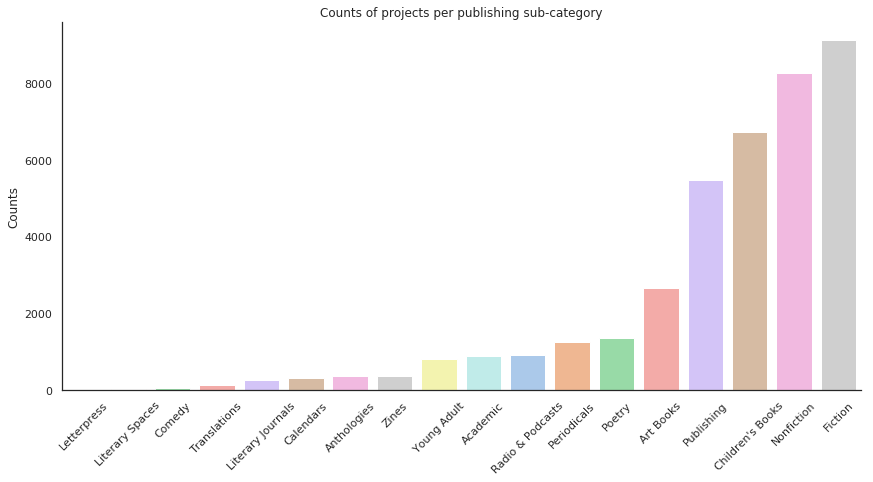

In [17]:
# Publishing sub-categories
row_order = list(ks_data.groupby(by=["category"]).count()['name'].sort_values().index.values)

g = sns.catplot(x='category', aspect = 2, order = row_order,
                data=ks_data, height=6, kind="count", palette="pastel")
g.set_ylabels("Counts")
g.set_xlabels("")
g.set_xticklabels(rotation=45)
plt.title('Counts of projects per publishing sub-category')

plt.show()    

Fiction seems to be the most common of the Publishing projects! This could indicate that it is also the most popular and, perhaps, that it is close to market saturation. To better understand this, success rates were compared across all *Publishing* sub-categories.

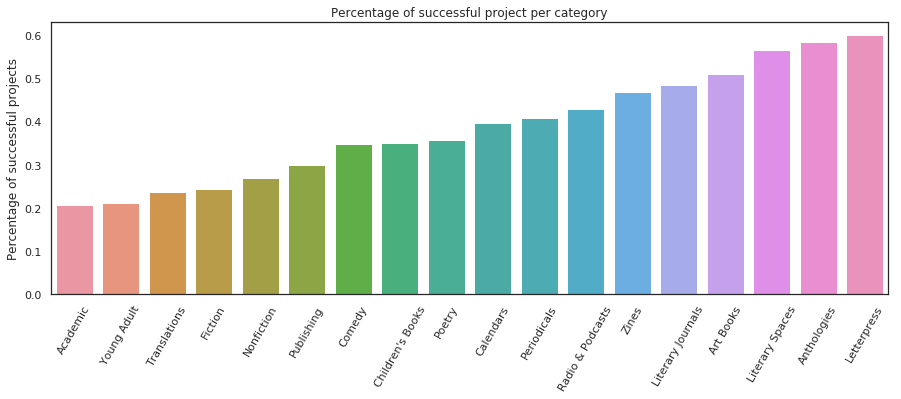

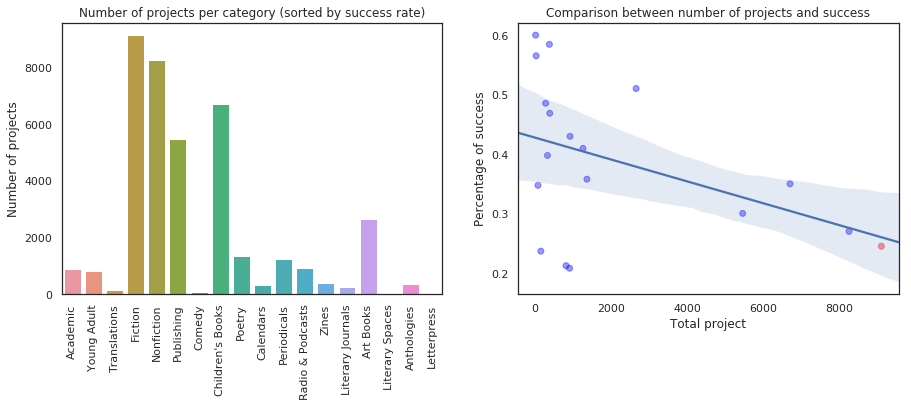

In [18]:
# Percentage of successful project per Publishing sub-category
success_rates = ks_data[['state','category']].groupby('category').aggregate(lambda x: np.mean(x['state'] == 'successful'))
success_rates['name'] = success_rates.index.values
success_rates['total'] = ks_data[['state','category']].groupby('category').count()

row_order = list(success_rates.sort_values(by = 'state').index.values)
fig = plt.figure(figsize=(15, 5))
g = sns.barplot(x='name', y = 'state', order = row_order,
                data=success_rates)
g.set(xlabel = "", ylabel ="Percentage of successful projects", 
     title = 'Percentage of successful project per category')
plt.xticks(rotation=60)
plt.show() 

# Relationship between success and total number of projects

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x='name', y = 'total', order = row_order,
                data=success_rates)
ax1.set(xlabel = "", ylabel ="Number of projects", 
     title = 'Number of projects per category (sorted by success rate)')
plt.xticks(rotation=90)

ax2 = fig.add_subplot(1,2,2)
cols = ['blue' if cat != 'Fiction' else 'red' for cat in success_rates.index ]
     
ax2 = sns.regplot(x= 'total', 
               y= 'state',
               data = success_rates,
               fit_reg=True, 
               scatter_kws={'color': cols,'alpha':0.4})

ax2.set(xlabel='Total project', ylabel='Percentage of success')
plt.title('Comparison between number of projects and success')
plt.show() 

Looking at the first barplot, which orders the various *Publishing* subcategories by relative success, it is clear that *Fiction* is one on the least successful sub-categories. Using this information to plot the total number of projects ordered by success rate seems to indicate that categories with more projects tend to have less success, which is confirmed by the scatterplot comparing success rate and total number of projects. Overall, there is a suggestion that categories with more projects tend to be less successful (in proportion), consistent with some "market saturation" for *Fiction* crowd-funding.

### Fiction per country
This potential "market saturation" may be specific for some countries, with maybe some having better opportunities than others. As such, country-specific success rates were analysed.

Available categories after subset are: Fiction 



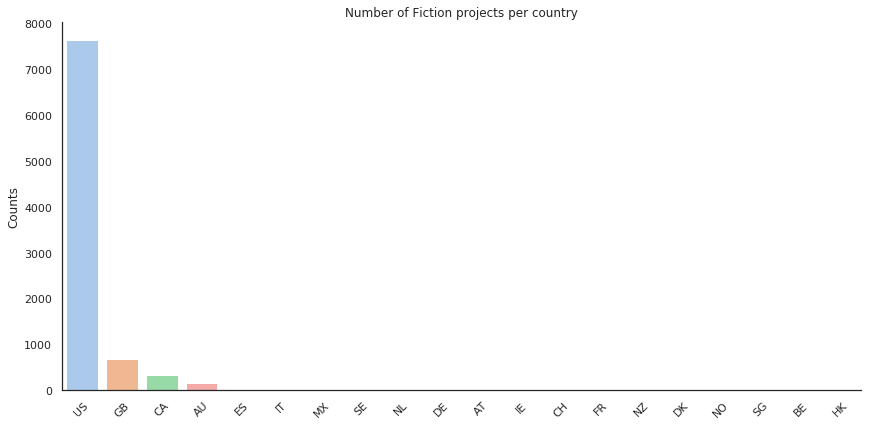

Number of projects per country:
 US(7643); GB(686); CA(330); AU(149); DE(37); NZ(36); ES(36); SE(35); MX(33); NL(26); FR(24); IT(21); IE(18); NO(16); DK(8); SG(5); CH(5); BE(5); AT(5); HK(1)


In [19]:
# Subset to fiction
ks_data = ks_data[ks_data['category'] == 'Fiction']

## Confirm subset
print('Available categories after subset are: %s \n' % (''.join(ks_data['category'].unique())))

# Fiction projects per country
g = sns.catplot(x='country', aspect = 2,
        data=ks_data, height=6, kind="count", palette="pastel")
g.set_ylabels("Counts")
g.set_xlabels("")
g.set_xticklabels(rotation=45)
plt.title('Number of Fiction projects per country')
plt.show()

# Fiction numbers per country
rates_countries = ks_data.groupby('country').count().iloc[:,1].sort_values(ascending = False)
rates_countries = zip(rates_countries.index.values, list(map(str, rates_countries)))
print('Number of projects per country:\n',
      '; '.join([i + '('+ j+')' for i,j in rates_countries]))

Fiction publishing projects are far more common in the United States compared with any other country. United States is followed by Great Britain, Canada and Australia, all of which are markets for English literature. As such, the focus of the analysis will be on these countries.

Available countries after subset are: US; GB; CA; AU 



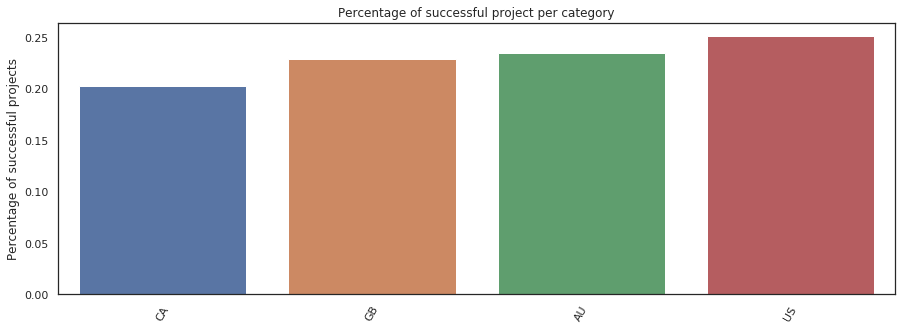

state      failed  successful
country                      
AU       0.765101    0.234899
CA       0.796970    0.203030
GB       0.771137    0.228863
US       0.748136    0.251864

In [20]:
# Subset to 4 main countries
ks_data = ks_data[ks_data['country'].isin(['US','CA', 'AU', 'GB'])]

## Confirm subset
print('Available countries after subset are: %s \n' % ('; '.join(ks_data['country'].unique())))

# Percentage of successful projects
cat_success = ks_data[['country', 'state']].groupby('country').aggregate(lambda x: np.mean(x['state'] == 'successful'))
cat_success['name'] = cat_success.index.values

row_order = list(cat_success.sort_values(by = 'state').index.values)

fig = plt.figure(figsize=(15, 5))
g = sns.barplot(x='name', y = 'state', order = row_order,
                data=cat_success)
g.set(xlabel = "", ylabel ="Percentage of successful projects", 
     title = 'Percentage of successful project per category')
plt.xticks(rotation=60)

plt.show() 

# Cross table values
pd.crosstab(ks_data['country'], ks_data['state'], normalize ='index')

Even though the United States has by far the greatest number of *Fiction* projects, its success rate is slightly better than those for the Great Britain, Canada or Australia. Considering the [estimated population](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)) of these countries, the United States would have at least twice as many projects on Kickstarter per million people compared to the other countries, with no major changes in success rate. Overall, there is no indication of market differences between these countries, and it is unlikely that the saturation has been reached.

### Association with success and other variables
A number of reasons for a project being successful can be thought of:
  * A successful project is generally a project that has a longer duration, and thus can gain more visibility.
  * A project that has a lower financial goal, that is, an easier target to reach, is more likely to be funded. 
  * It is possible that funding is affected by seasonality, for example, people spend less time on Kickstarter during Summer holidays and thus less funding is made available. 

The associations of these variables with a successful project were explored.

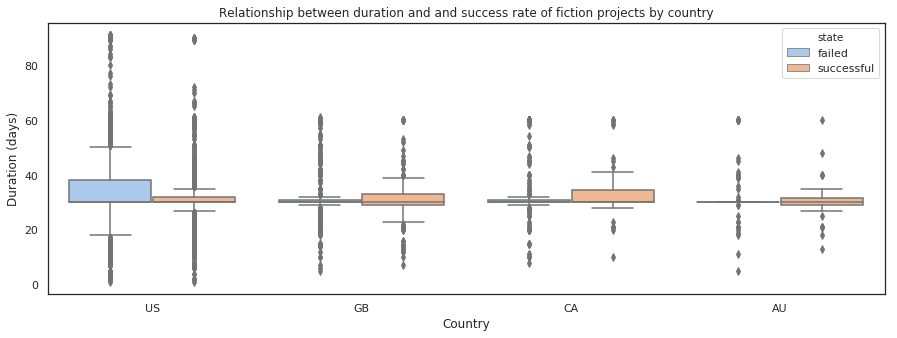

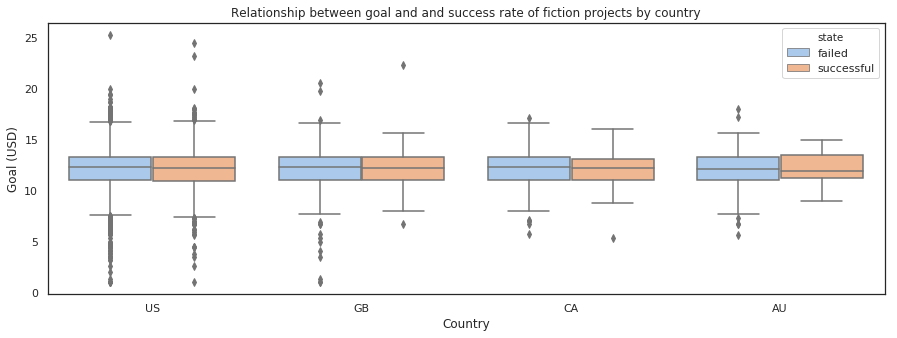

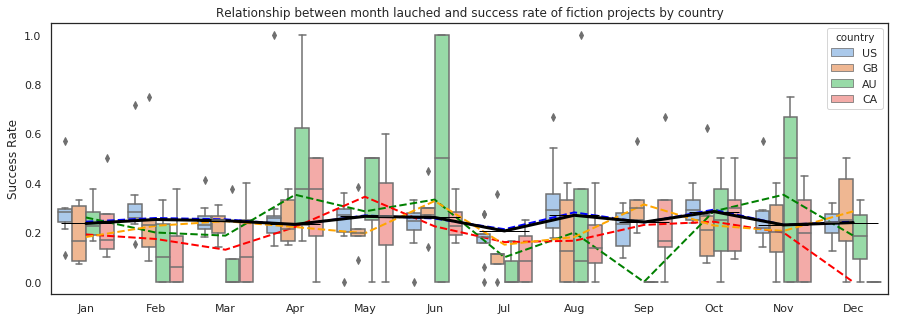

In [21]:
# State and duration for main countries
ks_data['duration'] = ks_data['duration'].astype('timedelta64[D]').astype('int64').values

plt.figure(figsize=(15, 5))
sns.boxplot(x='country',y='duration',hue='state', data = ks_data, palette='pastel')  
plt.title('Relationship between duration and and success rate of fiction projects by country')
plt.ylabel('Duration (days)')
plt.xlabel('Country')
plt.show()

# State and goal for main countries

plt.figure(figsize=(15, 5))
sns.boxplot(x='country',y='log_goal',hue='state', data = ks_data, palette='pastel')  
plt.title('Relationship between goal and and success rate of fiction projects by country')
plt.ylabel('Goal (USD)')
plt.xlabel('Country')
plt.show()

# State and month for main countries

seasonality_countries = ks_data[['year','month', 'state','country']]
seasonality_countries = seasonality_countries.groupby(['year','country', 'month']).aggregate(lambda x: np.mean(x == 'successful'))
seasonality_countries = seasonality_countries.reset_index()

plt.figure(figsize=(15, 5))
sns.boxplot(x='month',y='state',hue='country', data = seasonality_countries, palette='pastel', 
            order = [dt.datetime.strptime(str(i), '%m').strftime("%b") for i in range(1,13)])  
plt.title('Relationship between month lauched and success rate of fiction projects by country')
plt.ylabel('Success Rate')
plt.xlabel('')

seasonality = ks_data[['month', 'state', 'country']]

seasonality_mean = seasonality.groupby(['month']).aggregate(lambda x: np.mean(x == 'successful'))
months_ordered = [dt.datetime.strptime(str(i), '%m').strftime("%b") for i in range(1,13)]
seasonality_mean = seasonality_mean.reindex(months_ordered)
seasonality_mean = seasonality_mean.reset_index()

seasonality_country = seasonality.groupby(['country', 'month']).aggregate(lambda x: np.mean(x == 'successful'))
multi_idx =  [(c, m) for m in months_ordered for c in ['US', 'AU', 'CA', 'GB']]
seasonality_country = seasonality_country.reindex(multi_idx)
seasonality_country = seasonality_country.reset_index(level = 1)

plt.plot('month', 'state', data=seasonality_country.loc['US'],  ms=50, 
               linestyle='--', linewidth = 2, color = 'blue')
plt.plot('month', 'state', data=seasonality_country.loc['AU'],  ms=50, 
               linestyle='--', linewidth = 2, color = 'green')
plt.plot('month', 'state', data=seasonality_country.loc['CA'],  ms=50, 
               linestyle='--', linewidth = 2, color = 'red')
plt.plot('month', 'state', data=seasonality_country.loc['GB'],  ms=50, 
               linestyle='--', linewidth = 2, color = 'orange')
plt.plot('month', 'state', data=seasonality_mean,  ms=50, 
               linestyle='-', linewidth = 3, marker='_', color = 'black')

plt.show()

No obvious differences between the USD goal of successful and failed projects is noticeable. Unlike expected, it seems that successful projects tend to have a lower duration than those projects that failed in the Unites States. This may be the opposite of Australia, Canada and Great Britain, where longer projects could be more successful. Finally, an effect of seasonality is not apparent at a global level (black line), perhaps with the exception of particularly lower success rate for projects started in July. However, the average seems to be influenced by the lack of seasonality in the United States (blue dashed line), and country-specific effects cannot be excluded (particularly for Canada and Australia).

## Hypothesis
The previous exploratory analysis suggests that project duration could be associated with success, where
successful projects have lower duration than those projects that failed in the Unites States but longer durations in Australia, Canada and Great Britain. The data was grouped as projects from Unites States and those from other countries and the differences in duration between successful and failed projects were compared using a T-test.

In [22]:
US = ks_data[ks_data['country']=='US']
OTHER = ks_data[ks_data['country']!='US']

print('The mean difference in project duration between successful and failed project for USA is %1.2f and for non-US is %1.2f (overall: %1.2f)' % 
          (US.loc[US['state']=='successful', 'duration'].mean() - US.loc[US['state']=='failed', 'duration'].mean(),
          OTHER.loc[OTHER['state']=='successful', 'duration'].mean() - OTHER.loc[OTHER['state']=='failed', 'duration'].mean(),
          ks_data.loc[ks_data['state']=='successful', 'duration'].mean() - ks_data.loc[ks_data['state']=='failed', 'duration'].mean()))

print('The p-value for these difference is %1.2e for USA and %1.2e for non-USA (overall: %1.2e)' % 
      (ttest_ind(US.loc[US['state']=='successful', 'duration'], US.loc[US['state']=='failed', 'duration']).pvalue,
      ttest_ind(OTHER.loc[OTHER['state']=='successful', 'duration'], OTHER.loc[OTHER['state']=='failed', 'duration']).pvalue,
      ttest_ind(ks_data.loc[ks_data['state']=='successful', 'duration'], ks_data.loc[ks_data['state']=='failed', 'duration']).pvalue))


The mean difference in project duration between successful and failed project for USA is -3.70 and for non-US is -1.50 (overall: -3.41)
The p-value for these difference is 3.02e-29 for USA and 5.30e-02 for non-USA (overall: 3.35e-29)


It seems that, even though not immediately apparent, the average duration was significantly lower for all countries considered. To have a better idea of the effect size of these differences, success rate was compared between projects with lower than average duration and projects with higher than average duration projects.

In [23]:
shorter = ks_data.loc[ks_data['duration'] < ks_data['duration'].mean(),'state'].value_counts(normalize = True)['successful'] * 100
longer = ks_data.loc[ks_data['duration'] > ks_data['duration'].mean(),'state'].value_counts(normalize = True)['successful'] * 100

print('''Shorter than average projects had a success rate of %1.2f%% while longer than average projects have a success rate of %1.2f%%.
This represents a difference of %1.2f%%.
The average duration for all projects was %d days.''' % 
      (shorter, longer, shorter - longer,
      ks_data['duration'].mean()))

Shorter than average projects had a success rate of 26.91% while longer than average projects have a success rate of 18.60%.
This represents a difference of 8.31%.
The average duration for all projects was 34 days.


A significant difference of more than 8% in success rates for projects shorter than average suggests a strong (and unexpected) effect of the project duration on funding success. To better understand this effect, it was analysed in more detail.



* Additional comparisons:
 < 15 days: 43.17%
 < 20 days: 37.98%
 < 25 days: 35.93% 
 < 30 days: 35.60%
 > 40 days: 16.06%
 > 45 days: 13.64%
 > 50 days: 12.89% 
 > 55 days: 12.40%


**These results look interesting, particularly the way sucess rates monotonically decrease.** As such all values were screened and the results plotted:

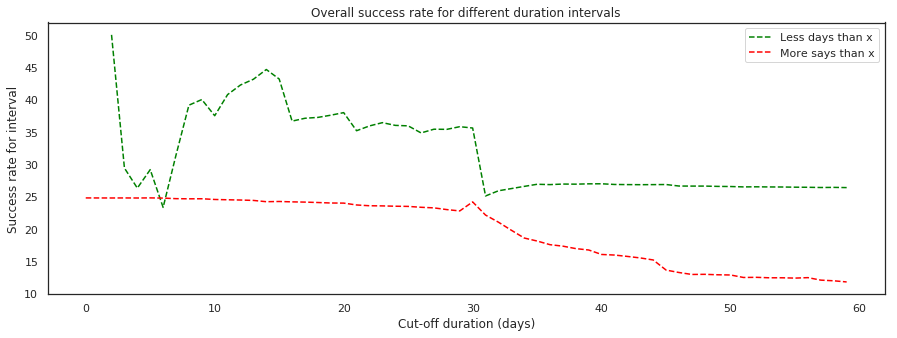

In [24]:
## Refine the intervals to check for global trends
print('\n\n* Additional comparisons:\n < 15 days: %1.2f%%\n < 20 days: %1.2f%%\n < 25 days: %1.2f%% \n < 30 days: %1.2f%%' % 
      (ks_data.loc[ks_data['duration'] < 15,'state'].value_counts(normalize = True)['successful'] * 100, 
      ks_data.loc[ks_data['duration'] < 20,'state'].value_counts(normalize = True)['successful'] * 100, 
      ks_data.loc[ks_data['duration'] < 25,'state'].value_counts(normalize = True)['successful'] * 100, 
      ks_data.loc[ks_data['duration'] < 30,'state'].value_counts(normalize = True)['successful'] * 100))
print(' > 40 days: %1.2f%%\n > 45 days: %1.2f%%\n > 50 days: %1.2f%% \n > 55 days: %1.2f%%' % 
      (ks_data.loc[ks_data['duration'] > 40,'state'].value_counts(normalize = True)['successful'] * 100, 
      ks_data.loc[ks_data['duration'] > 45,'state'].value_counts(normalize = True)['successful'] * 100, 
      ks_data.loc[ks_data['duration'] > 50,'state'].value_counts(normalize = True)['successful'] * 100, 
      ks_data.loc[ks_data['duration'] > 55,'state'].value_counts(normalize = True)['successful'] * 100))
display(Markdown('**These results look interesting, particularly the way sucess rates monotonically decrease.** As such all values were screened and the results plotted:'))

## Due to interesting changes observed, make line plot
less_than = [ks_data.loc[ks_data['duration'] < T,'state'].value_counts(normalize = True)['successful'] * 100 for T in range(2,60)]
more_than = [ks_data.loc[ks_data['duration'] > T,'state'].value_counts(normalize = True)['successful'] * 100 for T in range(60)]

plt.figure(figsize=(15, 5))
plt.plot(range(2,60), less_than,  linestyle='--', marker='', color = 'green', label = 'Less days than x')
plt.plot(range(60), more_than,  linestyle='--', marker='', color = 'red', label = 'More says than x')
plt.legend(loc = 'upper right')
plt.xlabel('Cut-off duration (days)')
plt.ylabel('Success rate for interval')
plt.title('Overall success rate for different duration intervals')
plt.show()

The above plot unexpectedly suggests that there may be a "duration turning point" for the project success rate. The green line, which describes the success rate for projects with duration below the corresponding cut-off (x value), indicates that projects lasting less than 10-30 days show consistently high success rates (35-45%). However, a clear switch is observed around 30-32 days, suggesting that projects whose duration crosses this threshold will have lower success rates (of around 25%). This is confirmed by the red line, which shows the success rates for projects lasting longer than the cut-off (value on x-axis), where a small progressive decrease is noticed before day 30, and then the success rate quickly deteriorates (from 25% to 10%).

## Experimental design
#### The problem
An on-line book store owner is investing in independent fiction writers and wants to help them maximize their funding campaigns through Kickstarter, in order for more books to be published and consequently be sold at the on-line book store.

#### Potential solution
The exploratory analysis suggests that projects that stay on Kickstarter for fewer days than the average (34 days) have an 8% higher success rate than those that stay longer than the average. This shows a well defined *threshold duration* around days 32-33 (with the success rate dropping as much as 10%). Thus, reducing the time for each book is expected to result in more successful funding campaigns. **[*](#note)**


#### Testing: design
An A/B testing design is suggested, where two crowd-funding campaign versions will be used: a faster campaign (A) version, lasting 20 days, and a longer campaign (B) version lasting 40 days. Visitors to the on-line book store will be randomly assigned to one of the campaign versions and will only be redirected to the assigned version.

From all participating authors, a random half will be assigned to the test group, while the remaining half will be kept on a waiting group. The test group will be randomly advertised as either version A and B and the success rate of each of these campaigns will be measured as the main outcome. However, as the funders' community is being divided between these two campaign versions, it will be more difficult to achieve the funding goals and the success rates may be artificially lower. To take this into account, secondary outcomes of interest to be considered will be the percentage of the goal pledged and the number of backers, as measures of how close to completion and how *"famous"* each campaign was. The authors in the waiting group will be exclusively assigned to the campaign version B, on the assumption that these campaigns will provide more visibility due to their longer durations.

#### Testing: analysis plan
The significance of the differences between success rates and percentage of goal funded will be accessed using a Z-test, while the differences in number of backers will be tested with a T-test.

#### Testing: benchmark
After 6 months, the results for the test group will be analysed. If these show a significant increase in the  *percentage of the goal pledged* of at least 5% for the campaign version A, a random sample corresponding to 50% of the waiting group will be assigned to version A. Otherwise, no changes are make so more data can be collected and this evaluation repeated at 12 months. After a new 6 months period, the overall differences between authors on campaigns versions A and B will be tested to confirm the hypothesis.

  * **What's the point of the waiting group? Why not simply have all authors on the test groups?** The reason why an waiting group was included in the design is not related to the testing method itself, but with pragmatic considerations. Note that the fact that a book is advertised on two different Kickstarter campaigns will divide the funding pledged and most likely result in unsuccessful campaigns that would have succeeded otherwise (funds are only collected if successful, leading to an *all-or-nothing* model). To safeguard the authors from this happening, and maintain a stream of successfully funded projects, it was considered best to holdout some books from the test. Depending on the results, the campaigns for this holdout group will be adapted in order to maximize their successful crow-funding at benchmarking.
  * **Why not simply assign authors randomly to each version if this would result in more successful projects, instead of splitting the funder's capital?** One has to consider the effect of individual authors on the results. It is highly likely that authors with better literary skills will be more successful in their campaigns. As a result, the individual skill of an author will be a confounding factor in the analysis and must be accounted for. Unfortunately, "skill" is a very wide abstract concept with a wide and complex meaning which makes it difficult to quantify *a-priori*. This also applies to different books by the same author. The best way to account for this is to have the exact same book advertised in two different ways initially. 

<a id='note'></a>
*** Note**: While checking Kickstarted for the maximum duration allowed, I found that their [experience](https://help.kickstarter.com/hc/en-us/articles/115005128434-What-is-the-maximum-project-duration-) matches the analysis presented here, thus providing external validation and strengthening the proposed hypothesis.

In [25]:
#### Session notes
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, IPython

Software versions
Python 3.6.7 64bit [GCC 8.2.0]
IPython 6.5.0
OS Linux 4.15.0 39 generic x86_64 with Ubuntu 18.04 bionic
pandas 0.23.4
numpy 1.15.1
matplotlib 2.2.3
seaborn 0.9.0
scipy 1.1.0
IPython 6.5.0
Fri Nov 30 11:13:53 2018 GMT